In [59]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

In [15]:
%matplotlib inline

# Tutorial

In [2]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

TypeError: a bytes-like object is required, not 'str'

# Read the data

In [2]:
"""\
convert dos linefeeds (crlf) to unix (lf)
usage: dos2unix.py <input> <output>
"""
import sys

content = ''
outsize = 0
with open("final_project_dataset_modified.pkl", 'rb') as infile:
    content = infile.read()
with open("final_project_dataset_modified_conv.pkl", 'wb') as output:
    for line in content.splitlines():
        outsize += len(line) + 1
        output.write(line + b'\n')

print("Done. Saved %s bytes." % (len(content)-outsize))

Done. Saved 6564 bytes.


In [8]:
### Load the dictionary containing the dataset
with open("final_project_dataset_conv.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)
    
### Load the dictionary containing the dataset
with open("final_project_dataset_modified.pkl", "rb") as data_file:
    data_dict_mod = pickle.load(data_file)

UnpicklingError: the STRING opcode argument must be quoted

In [64]:
data_init = pd.DataFrame(data_dict).T

In [65]:
data_init

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
METTS MARK,600000,NaN,NaN,NaN,mark.metts@enron.com,NaN,94299,29,38,1,...,NaN,1740,False,585062,NaN,365788,702,807,1061827,585062
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
ELLIOTT STEVEN,350000,NaN,-400729,NaN,steven.elliott@enron.com,4890344,78552,NaN,NaN,NaN,...,NaN,12961,False,1788391,NaN,170941,NaN,NaN,211725,6678735
CORDES WILLIAM R,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850,NaN,12,10,0,...,NaN,NaN,False,386335,NaN,NaN,58,764,NaN,1038185
HANNON KEVIN P,1500000,NaN,-3117011,NaN,kevin.hannon@enron.com,5538001,34039,32,32,21,...,1617011,11350,True,853064,NaN,243293,1035,1045,288682,6391065
MORDAUNT KRISTINA M,325000,NaN,NaN,NaN,kristina.mordaunt@enron.com,NaN,35018,NaN,NaN,NaN,...,NaN,1411,False,208510,NaN,267093,NaN,NaN,628522,208510
MEYER ROCKFORD G,NaN,1848227,NaN,NaN,rockford.meyer@enron.com,493489,NaN,28,0,0,...,NaN,NaN,False,462384,NaN,NaN,22,232,1848227,955873
MCMAHON JEFFREY,2600000,NaN,NaN,NaN,jeffrey.mcmahon@enron.com,1104054,137108,48,58,26,...,694862,297353,False,558801,NaN,370448,2228,2355,4099771,1662855
HAEDICKE MARK E,1150000,2157527,-934484,NaN,mark.haedicke@enron.com,608750,76169,1941,180,61,...,983346,52382,False,524169,-329825,374125,1847,4009,3859065,803094
PIPER GREGORY F,400000,1130036,-33333,NaN,greg.piper@enron.com,880290,43057,222,61,48,...,NaN,778,False,409554,-409554,197091,742,1238,1737629,880290


In [66]:
financial_features = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees']
email_features = ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']
email_features_mod = ['to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']
POI_label = ['poi']

In [67]:
# convert the datatypes (NaNs are strings currently which is not good)
data_init[financial_features] = data_init[financial_features].astype(float)
data_init[email_features_mod] = data_init[email_features_mod].astype(float)
data_init["poi"] = data_init["poi"].astype(bool)

# Explore the dataset

In [77]:
data_init[financial_features].count()

salary                        93
deferral_payments             37
total_payments               123
loan_advances                  2
bonus                         80
restricted_stock_deferred     17
deferred_income               47
total_stock_value            124
expenses                      93
exercised_stock_options      100
other                         91
long_term_incentive           64
restricted_stock             108
director_fees                 16
dtype: int64

Loan advances has only 4 datapoints.

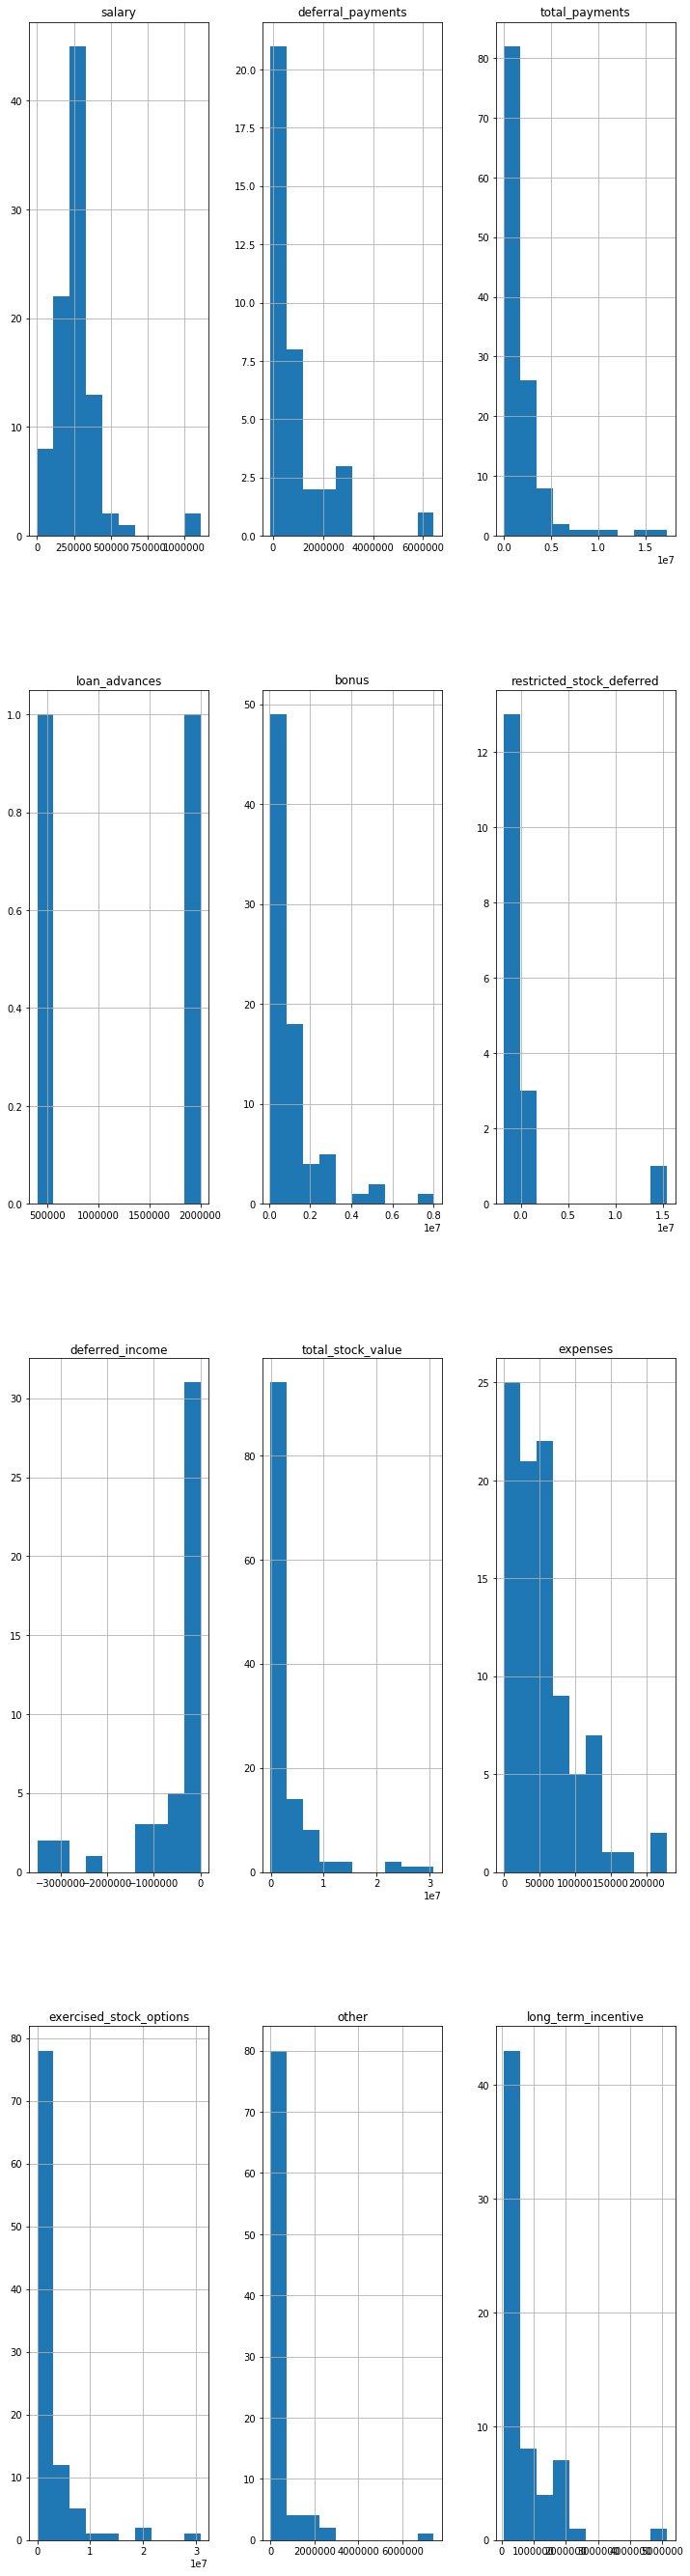

In [72]:
fig, axes = plt.subplots(len(financial_features)//3, 3, figsize=(12, 48))
for f,axis in zip(financial_features, axes.flatten()):
    data_init.hist(column=f, ax=axis)


The histograms look very unbalanced. Maybe there are some extreme values

In [70]:
data_init[financial_features].sort_values(by="total_payments", ascending=False)

,salary,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,exercised_stock_options,other,long_term_incentive,restricted_stock,director_fees
TOTAL,26704229.0,32083396.0,309886585.0,83925000.0,97343619.0,-7576788.0,-27992891.0,434509511.0,5235198.0,311764000.0,42667589.0,48521928.0,130322299.0,1398517.0
LAY KENNETH L,1072321.0,202911.0,103559793.0,81525000.0,7000000.0,NaN,-300000.0,49110078.0,99832.0,34348384.0,10359729.0,3600000.0,14761694.0,NaN
FREVERT MARK A,1060932.0,6426990.0,17252530.0,2000000.0,2000000.0,NaN,-3367011.0,14622185.0,86987.0,10433518.0,7427621.0,1617011.0,4188667.0,NaN
BHATNAGAR SANJAY,NaN,NaN,15456290.0,NaN,NaN,15456290.0,NaN,NaN,NaN,2604490.0,137864.0,NaN,-2604490.0,137864.0
LAVORATO JOHN J,339288.0,NaN,10425757.0,NaN,8000000.0,NaN,NaN,5167144.0,49537.0,4158995.0,1552.0,2035380.0,1008149.0,NaN
SKILLING JEFFREY K,1111258.0,NaN,8682716.0,NaN,5600000.0,NaN,NaN,26093672.0,29336.0,19250000.0,22122.0,1920000.0,6843672.0,NaN
MARTIN AMANDA K,349487.0,85430.0,8407016.0,NaN,NaN,NaN,NaN,2070306.0,8211.0,2070306.0,2818454.0,5145434.0,NaN,NaN
BAXTER JOHN C,267102.0,1295738.0,5634343.0,NaN,1200000.0,NaN,-1386055.0,10623258.0,11200.0,6680544.0,2660303.0,1586055.0,3942714.0,NaN
BELDEN TIMOTHY N,213999.0,2144013.0,5501630.0,NaN,5249999.0,NaN,-2334434.0,1110705.0,17355.0,953136.0,210698.0,NaN,157569.0,NaN
DELAINEY DAVID W,365163.0,NaN,4747979.0,NaN,3000000.0,NaN,NaN,3614261.0,86174.0,2291113.0,1661.0,1294981.0,1323148.0,NaN


TOTAL and KENNETH LAY are not in the same order of magnitude as the others in several categories. Drop them

In [71]:
# dropping the row total as it is not a person
data_init.drop("TOTAL", inplace=True)
# dropping kenneth lay as he distorts some categories
data_init.drop("LAY KENNETH L", inplace=True)

The histograms now look better, but loan advances has only two datapoints now. Drop it from featurelist

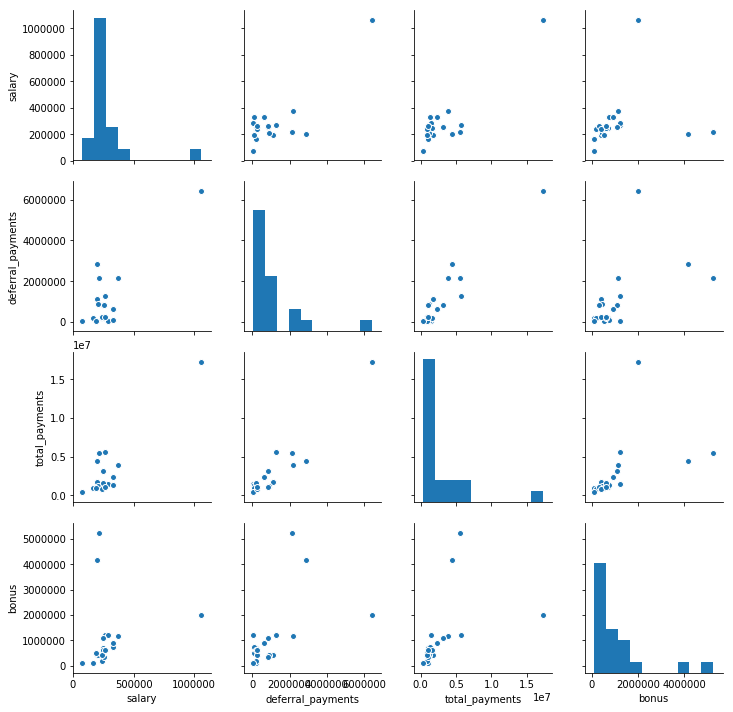

In [82]:
ft = ['salary', 'deferral_payments', 'total_payments', 'bonus', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock']
sns.pairplot(data_init[ft[:4]].dropna())

In [45]:
data_init[financial_features].sort_values(by="total_payments", ascending=False)

,salary,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,exercised_stock_options,other,long_term_incentive,restricted_stock,director_fees
LAY KENNETH L,1072321.0,202911.0,103559793.0,81525000.0,7000000.0,NaN,-300000.0,49110078.0,99832.0,34348384.0,10359729.0,3600000.0,14761694.0,NaN
FREVERT MARK A,1060932.0,6426990.0,17252530.0,2000000.0,2000000.0,NaN,-3367011.0,14622185.0,86987.0,10433518.0,7427621.0,1617011.0,4188667.0,NaN
BHATNAGAR SANJAY,NaN,NaN,15456290.0,NaN,NaN,15456290.0,NaN,NaN,NaN,2604490.0,137864.0,NaN,-2604490.0,137864.0
LAVORATO JOHN J,339288.0,NaN,10425757.0,NaN,8000000.0,NaN,NaN,5167144.0,49537.0,4158995.0,1552.0,2035380.0,1008149.0,NaN
SKILLING JEFFREY K,1111258.0,NaN,8682716.0,NaN,5600000.0,NaN,NaN,26093672.0,29336.0,19250000.0,22122.0,1920000.0,6843672.0,NaN
MARTIN AMANDA K,349487.0,85430.0,8407016.0,NaN,NaN,NaN,NaN,2070306.0,8211.0,2070306.0,2818454.0,5145434.0,NaN,NaN
BAXTER JOHN C,267102.0,1295738.0,5634343.0,NaN,1200000.0,NaN,-1386055.0,10623258.0,11200.0,6680544.0,2660303.0,1586055.0,3942714.0,NaN
BELDEN TIMOTHY N,213999.0,2144013.0,5501630.0,NaN,5249999.0,NaN,-2334434.0,1110705.0,17355.0,953136.0,210698.0,NaN,157569.0,NaN
DELAINEY DAVID W,365163.0,NaN,4747979.0,NaN,3000000.0,NaN,NaN,3614261.0,86174.0,2291113.0,1661.0,1294981.0,1323148.0,NaN
WHALLEY LAWRENCE G,510364.0,NaN,4677574.0,NaN,3000000.0,NaN,NaN,6079137.0,57838.0,3282960.0,301026.0,808346.0,2796177.0,NaN


In [81]:
data_dict

{'METTS MARK': {'salary': 365788,
  'to_messages': 807,
  'deferral_payments': 'NaN',
  'total_payments': 1061827,
  'loan_advances': 'NaN',
  'bonus': 600000,
  'email_address': 'mark.metts@enron.com',
  'restricted_stock_deferred': 'NaN',
  'deferred_income': 'NaN',
  'total_stock_value': 585062,
  'expenses': 94299,
  'from_poi_to_this_person': 38,
  'exercised_stock_options': 'NaN',
  'from_messages': 29,
  'other': 1740,
  'from_this_person_to_poi': 1,
  'poi': False,
  'long_term_incentive': 'NaN',
  'shared_receipt_with_poi': 702,
  'restricted_stock': 585062,
  'director_fees': 'NaN'},
 'BAXTER JOHN C': {'salary': 267102,
  'to_messages': 'NaN',
  'deferral_payments': 1295738,
  'total_payments': 5634343,
  'loan_advances': 'NaN',
  'bonus': 1200000,
  'email_address': 'NaN',
  'restricted_stock_deferred': 'NaN',
  'deferred_income': -1386055,
  'total_stock_value': 10623258,
  'expenses': 11200,
  'from_poi_to_this_person': 'NaN',
  'exercised_stock_options': 6680544,
  'from_

In [80]:
data_init.to_dict()

{'bonus': {'METTS MARK': 600000.0,
  'BAXTER JOHN C': 1200000.0,
  'ELLIOTT STEVEN': 350000.0,
  'CORDES WILLIAM R': nan,
  'HANNON KEVIN P': 1500000.0,
  'MORDAUNT KRISTINA M': 325000.0,
  'MEYER ROCKFORD G': nan,
  'MCMAHON JEFFREY': 2600000.0,
  'HAEDICKE MARK E': 1150000.0,
  'PIPER GREGORY F': 400000.0,
  'HUMPHREY GENE E': nan,
  'NOLES JAMES L': nan,
  'BLACHMAN JEREMY M': 850000.0,
  'SUNDE MARTIN': 700000.0,
  'GIBBS DANA R': nan,
  'LOWRY CHARLES P': nan,
  'COLWELL WESLEY': 1200000.0,
  'MULLER MARK S': 1100000.0,
  'JACKSON CHARLENE R': 250000.0,
  'WESTFAHL RICHARD K': nan,
  'WALTERS GARETH W': nan,
  'WALLS JR ROBERT H': 850000.0,
  'KITCHEN LOUISE': 3100000.0,
  'CHAN RONNIE': nan,
  'BELFER ROBERT': nan,
  'SHANKMAN JEFFREY A': 2000000.0,
  'WODRASKA JOHN': nan,
  'BERGSIEKER RICHARD P': 250000.0,
  'URQUHART JOHN A': nan,
  'BIBI PHILIPPE A': 1000000.0,
  'RIEKER PAULA H': 700000.0,
  'WHALEY DAVID A': nan,
  'BECK SALLY W': 700000.0,
  'HAUG DAVID L': nan,
  'ECHOLS 

In [11]:
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

NameError: name 'my_dataset' is not defined

# clustermap ordering

In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import linkage
import scipy.spatial.distance as ssd

In [123]:
# create some random 3 dimensional data
# np.random.seed(seed=1)
data = pd.DataFrame(index=range(10), columns=["x", "y", "z"], data=np.random.random(size=(10,3)))
data

,x,y,z
0,0.073364,0.469239,0.096172
1,0.903370,0.119490,0.524799
2,0.083623,0.916861,0.910448
3,0.298930,0.584389,0.565912
4,0.613938,0.956536,0.260979
5,0.231015,0.533448,0.949938
6,0.493060,0.540601,0.765485
7,0.045346,0.139966,0.792404
8,0.029801,0.883125,0.540788
9,0.447980,0.892136,0.377584


In [135]:
# np.random.seed(seed=1)
# create some random clustering with 3 different labels
cl_labels = [0,1,2]
cluster_labels = np.random.choice(cl_labels, size=data.shape[0])
prepared_clustering = pd.Series(index=data.index, data=cluster_labels)
prepared_clustering

0    2
1    2
2    2
3    0
4    1
5    2
6    2
7    2
8    2
9    0
dtype: int32

In [136]:
# create a "distance" matrix
# distance for items in the same cluster will be zero, distance to elements outside the cluster are arbitrary (non-zero)
d = np.array([cluster_labels]*10)
distance_matrix = pd.DataFrame(index=data.index, columns=data.index, data = (d != d.T)).astype(int)
distance_matrix

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,1,1,0,0,0,0,1
1,0,0,0,1,1,0,0,0,0,1
2,0,0,0,1,1,0,0,0,0,1
3,1,1,1,0,1,1,1,1,1,0
4,1,1,1,1,0,1,1,1,1,1
5,0,0,0,1,1,0,0,0,0,1
6,0,0,0,1,1,0,0,0,0,1
7,0,0,0,1,1,0,0,0,0,1
8,0,0,0,1,1,0,0,0,0,1
9,1,1,1,0,1,1,1,1,1,0


In [137]:
# create some colors to illustrate the clustering
colors = dict(zip(cl_labels, sns.hls_palette(len(cl_labels), l=0.5, s=0.8)))
row_colors = prepared_clustering.map(colors)

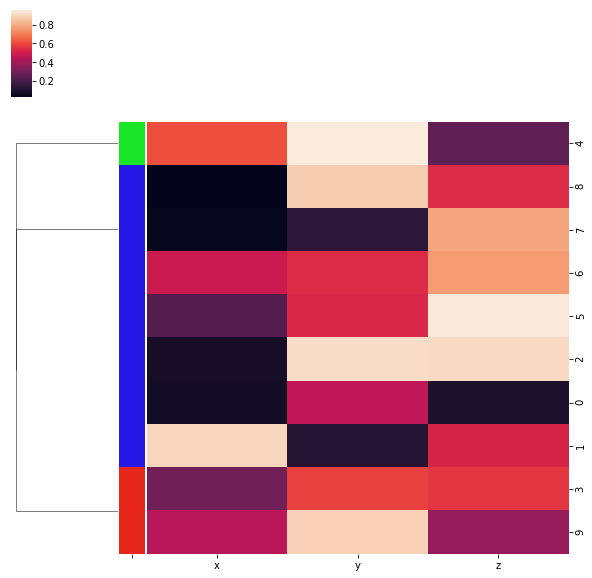

In [138]:
# plotting the clustermap
sns.clustermap(data,
               col_cluster=False,
               # dont turn off row_clustering, because it will do some default clustering/ordering
               row_cluster=True,
               # set the row_linkage to a custom linkage generated from the distance matrix
               # have no clue, but without the ssd.sequarform a warning is displayed. the result is the same anyway
               #row_linkage=linkage(distance_matrix),
               row_linkage=linkage(ssd.squareform(distance_matrix)),
               # decorate with the rows
               row_colors=row_colors
              )

### check it with some ordering

In [46]:
order = pd.Series(np.random.permutation(range(10)))
#order = pd.Series(range(10))

In [48]:
dst = pd.DataFrame(index=order.index, columns=order.index)
for i in dst.index:
    dst[i] = order[i] - order
    
dst = (dst.abs() > 1).astype(int)
dst

,0,1,2,3,4,5,6,7,8,9
0,0,0,1,1,1,1,1,1,1,1
1,0,0,1,0,1,1,1,1,1,1
2,1,1,0,1,0,1,1,0,1,1
3,1,0,1,0,1,1,1,1,1,0
4,1,1,0,1,0,1,1,1,1,0
5,1,1,1,1,1,0,0,1,0,1
6,1,1,1,1,1,0,0,0,1,1
7,1,1,0,1,1,1,0,0,1,1
8,1,1,1,1,1,0,1,1,0,1
9,1,1,1,0,0,1,1,1,1,0


In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import linkage
import scipy.spatial.distance as ssd

# create some random 3 dimensional data
data = pd.DataFrame(index=range(10), columns=["x", "y", "z"], 
data=np.random.random(size=(10,3)))

# create some random clustering with 3 different labels
cl_labels = [0,1,2]
cluster_labels = np.random.choice(cl_labels, size=data.shape[0])
prepared_clustering = pd.Series(index=data.index, data=cluster_labels)

# create a "distance" matrix
# distance for items in the same cluster will be zero, distance to elements outside the cluster are arbitrary (non-zero)
d = np.array([cluster_labels]*10)
#distance_matrix = pd.DataFrame(index=data.index, columns=data.index, data = (d != d.T)).astype(int)
distance_matrix = pd.DataFrame(index=data.index, columns=data.index, data = dst.abs())

# create some colors to illustrate the clustering
#colors = dict(zip(cl_labels, sns.hls_palette(len(cl_labels), l=0.5, s=0.8)))
#row_colors = prepared_clustering.map(colors)
colors = dict(zip(range(10), sns.hls_palette(10, l=0.5, s=0.8)))
row_colors = order.map(colors)

C:\Users\CSK\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0.0
  'left=%s, right=%s') % (left, right))


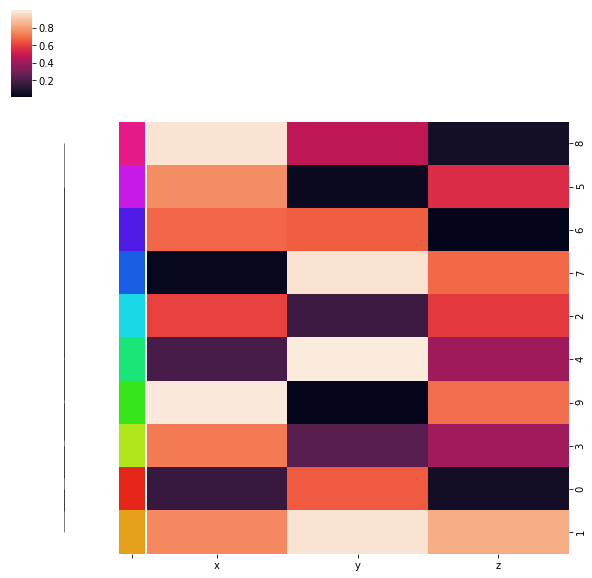

In [51]:
sns.clustermap(data,
           col_cluster=False,
           # don't turn off row_clustering, because it will do some default clustering/ordering
           row_cluster=True,
           # set the row_linkage to a custom linkage generated from the distance matrix
           # have no clue, but without the ssd.squareform a warning is displayed. the result is the same anyway
           #row_linkage=linkage(distance_matrix),
           row_linkage=linkage(ssd.squareform(distance_matrix)),
           # decorate with the rows
           row_colors=row_colors
          )